In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras import utils

os.listdir('/content/drive/MyDrive/pneumonia')


['train', 'test', 'val']

In [ ]:
len(os.listdir(('/content/drive/MyDrive/pneumonia/train/PNEUMONIA')))

1482

Train set:
PNEUMONIA=1482
NORMAL=1351
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=16
NORMAL=16


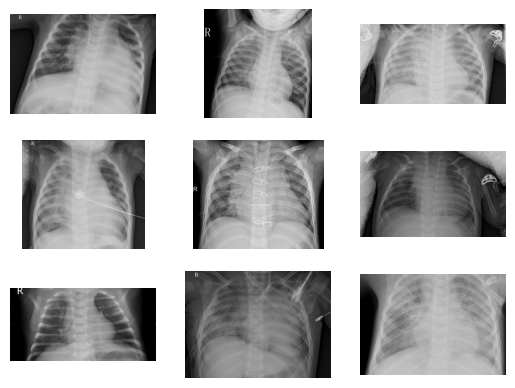

In [ ]:
train_dir = '/content/drive/MyDrive/pneumonia/train'
test_dir = '/content/drive/MyDrive/pneumonia/test'
val_dir = '/content/drive/MyDrive/pneumonia/val'

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir('/content/drive/MyDrive/pneumonia/train/PNEUMONIA')
pneumonia_dir = '/content/drive/MyDrive/pneumonia/train/PNEUMONIA'

image_files = [file for file in os.listdir(pneumonia_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]

# Iterate through the image files and plot them
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, image_files[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.show()

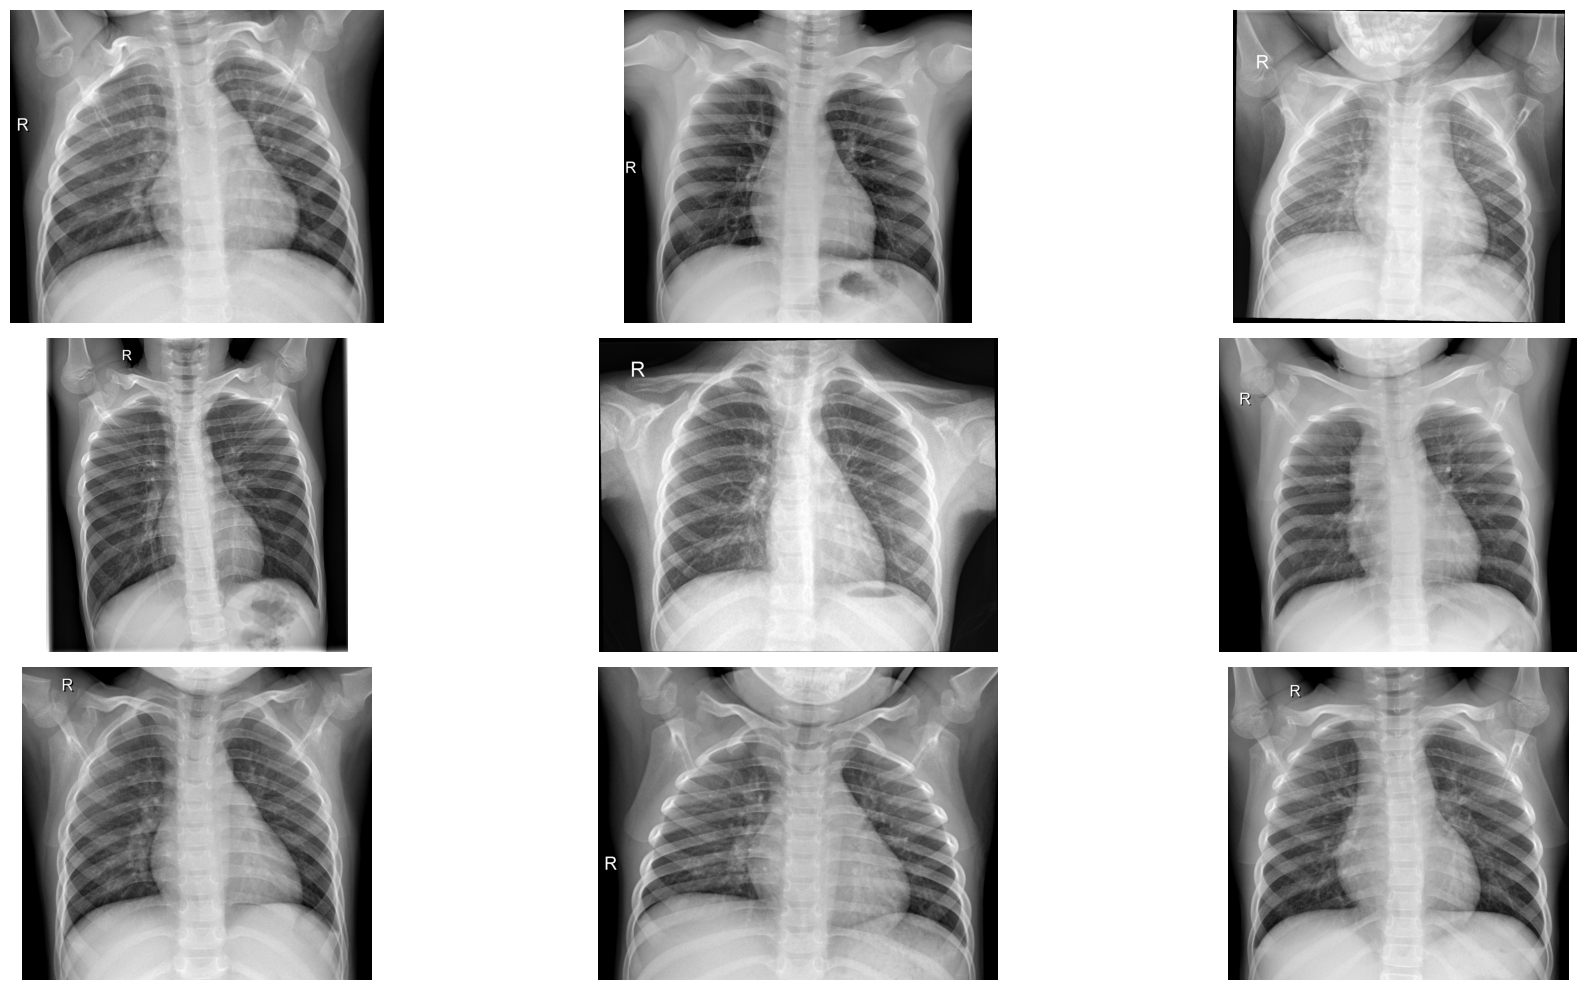

In [ ]:
normal = os.listdir('/content/drive/MyDrive/pneumonia/train/NORMAL')
normal_dir = '/content/drive/MyDrive/pneumonia/train/NORMAL'

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

The dimensions of the image are 1348 pixels width and 1608 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 137.1682 and the standard deviation is 59.9763


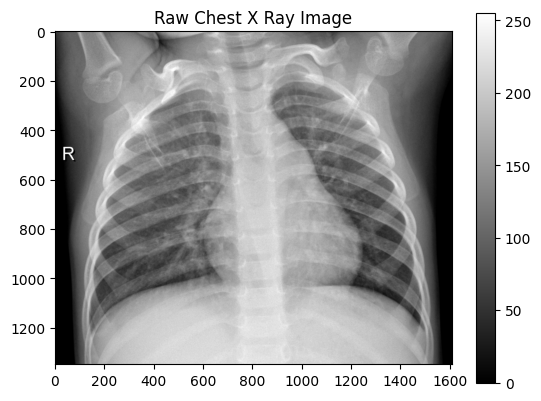

In [ ]:
normal_img = os.listdir(('/content/drive/MyDrive/pneumonia/train/NORMAL'))[0]
normal_dir = '/content/drive/MyDrive/pneumonia/train/NORMAL'
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

<ipython-input-7-d45ac08d2db9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(),


Text(0, 0.5, '# Pixels in Image')

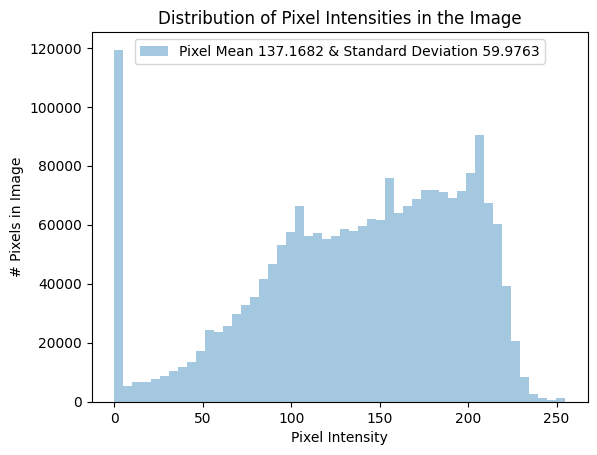

In [ ]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
train = image_generator.flow_from_directory(train_dir,
                                            batch_size=8,
                                            shuffle=True,
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir,
                                                batch_size=1,
                                                shuffle=False,
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir,
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 2833 images belonging to 2 classes.
Found 32 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 3.2148 and the minimum is -2.5646
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


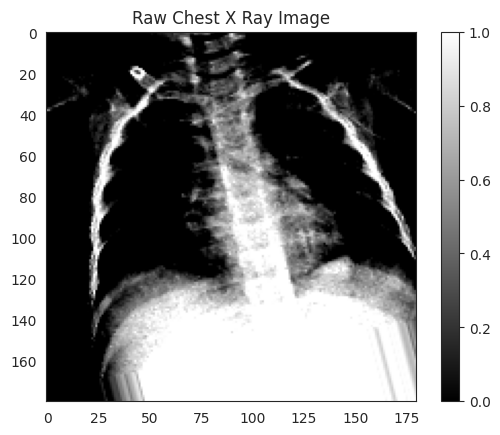

In [ ]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

<ipython-input-11-3361fab08a7d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

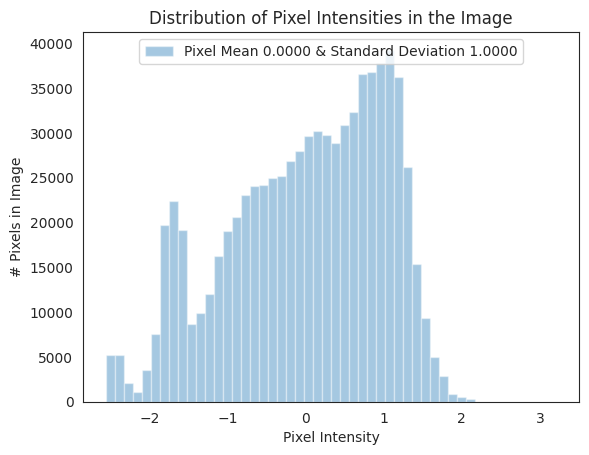

In [ ]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [ ]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.52
Weight for class 1: 0.48


# ResNet



In [ ]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')



94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization

In [ ]:
    resnet_model = tf.keras.Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = resnet_model.fit(train,
          epochs=50,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)


Epoch 1/50
100/100 [==============================] - 195s 1s/step - loss: 0.3685 - accuracy: 0.6438 - precision: 0.6516 - recall: 0.6404 - val_loss: 112.7825 - val_accuracy: 0.3600 - val_precision: 0.3600 - val_recall: 1.0000
Epoch 2/50
100/100 [==============================] - 107s 1s/step - loss: 0.2904 - accuracy: 0.7375 - precision: 0.7793 - recall: 0.6976 - val_loss: 0.6937 - val_accuracy: 0.6400 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 84s 837ms/step - loss: 0.2841 - accuracy: 0.7437 - precision: 0.7819 - recall: 0.6832 - val_loss: 2.0255 - val_accuracy: 0.3600 - val_precision: 0.3600 - val_recall: 1.0000
Epoch 4/50
100/100 [==============================] - 64s 646ms/step - loss: 0.2443 - accuracy: 0.7950 - precision: 0.8413 - recall: 0.7536 - val_loss: 0.7453 - val_accuracy: 0.3600 - val_precision: 0.3600 - val_recall: 1.0000
Epoch 5/50
100/100 [==============================] - 52s 521ms/step - loss: 0.2150 - 

Text(0.5, 1.0, 'Accuracy Evolution')

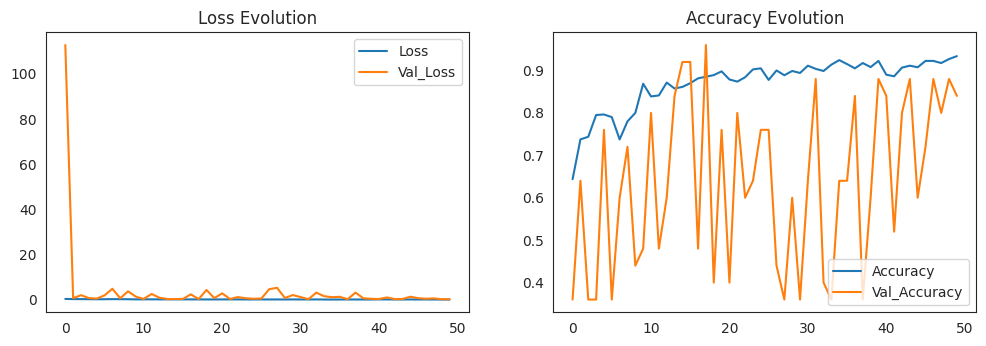

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 108s 174ms/step - loss: 0.3657 - accuracy: 0.8141 - precision: 0.9308 - recall: 0.7590
Test Accuracy: 81.41%
355/355 [==============================] - 70s 197ms/step - loss: 0.2085 - accuracy: 0.8980 - precision: 0.9975 - recall: 0.8070
Train Accuracy: 89.80%


In [ ]:
predicted_vals = resnet_model.predict(test, steps=len(test))

624/624 [==============================] - 23s 32ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[173  61]
 [  8 382]]


,0,1,accuracy,macro avg,weighted avg
precision,0.955801,0.862302,0.889423,0.909052,0.897364
recall,0.739316,0.979487,0.889423,0.859402,0.889423
f1-score,0.833735,0.917167,0.889423,0.875451,0.885880
support,234.000000,390.000000,0.889423,624.000000,624.000000
